In [1]:
import matplotlib.pyplot as plt
from models import CnnModel, CrnnLongModel, CrnnModel, RnnModel, MambaVisionModel
from train import main_train, validate_test, record_matrix
from Paras import Para
from data_loader import torch_dataset_loader
import torch
from kornia import augmentation as K
from kornia.augmentation import AugmentationSequential


# MambaVision model
## Define Paras

In [2]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 50

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [3]:
MambaVision = MambaVisionModel().to("cuda")

## Train Model

In [4]:
res = main_train(model=MambaVision, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='MambaVisionModel.json',
                 save_name='MambaVisionModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  70/280 batches | 55.49ms/ batch | BCE: 0.5710 | Accuracy: 15.71% |
Epoch  1 | 140/280 batches | 50.53ms/ batch | BCE: 0.4545 | Accuracy: 21.25% |
Epoch  1 | 210/280 batches | 48.93ms/ batch | BCE: 0.3958 | Accuracy: 26.29% |
Epoch  1 | 280/280 batches | 48.19ms/ batch | BCE: 0.3626 | Accuracy: 28.90% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 13.51s | BCE: 0.3626 | Accuracy: 28.90% |
End of validation epoch   1 | time:  0.56s | BCE: 0.2203 | Accuracy: 49.96% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches | 46.37ms/ batch | BCE: 0.2405 | Accuracy: 44.79% |
Epoch  2 | 140/280 batches | 46.16ms/ batch | BCE: 0.2351 | Accuracy: 46.21

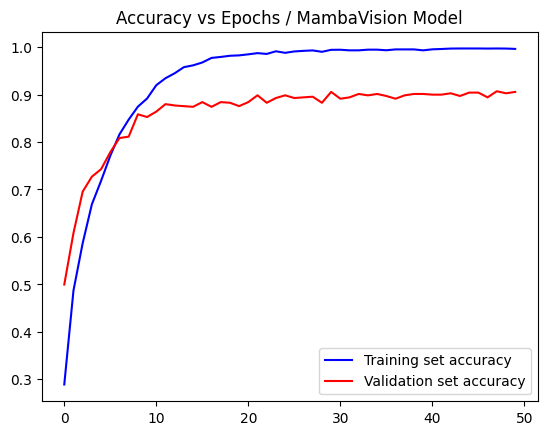

In [5]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / MambaVision Model')
plt.legend()
plt.show()

## Test Model

In [6]:
Para.MODEL_SAVE_FOlD = './'
MambaVision.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsMambaVisionModel.pt'))
validate_test(model=MambaVision, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.54s | BCE: 0.0844 | Accuracy: 90.56% |
---------------------------------------------------------------------------------------------------


(0.0844389490442284, 0.9056390977443608)

In [7]:
MambaVision.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsMambaVisionModel.pt'))
record_matrix(model=MambaVision, use_loader=test_loader, log_name='MambaVisionMatrix.json')

End of Matrix Record, Save file in ./logsMambaVisionMatrix.json
---------------------------------------------------------------------------------------------------


# MambaVision model with augmantations
## Define Paras

In [21]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 80

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [22]:
## Augmantation list
aug_list = AugmentationSequential(
    K.RandomHorizontalFlip(p=0.4),
    K.RandomGaussianNoise(mean=0.0, std=0.1, p=0.5),
    K.RandomErasing(scale=(0.02, 0.2), ratio=(0.3, 3.3), p=0.3),
    same_on_batch=False,
)

# Model intializing
MambaVisionAug = MambaVisionModel(aug_list).to("cuda")

## Train Model

In [23]:
res = main_train(model=MambaVisionAug, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='MambaVisionAugModel.json',
                 save_name='MambaVisionAugModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num
                 )

Epoch  1 |  70/280 batches | 50.41ms/ batch | BCE: 0.6169 | Accuracy: 13.79% |
Epoch  1 | 140/280 batches | 49.68ms/ batch | BCE: 0.4885 | Accuracy: 17.07% |
Epoch  1 | 210/280 batches | 49.93ms/ batch | BCE: 0.4270 | Accuracy: 20.48% |
Epoch  1 | 280/280 batches | 49.97ms/ batch | BCE: 0.3892 | Accuracy: 23.74% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 14.02s | BCE: 0.3892 | Accuracy: 23.74% |
End of validation epoch   1 | time:  0.67s | BCE: 0.2413 | Accuracy: 45.51% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches | 51.39ms/ batch | BCE: 0.2608 | Accuracy: 37.71% |
Epoch  2 | 140/280 batches | 50.66ms/ batch | BCE: 0.2527 | Accuracy: 39.46

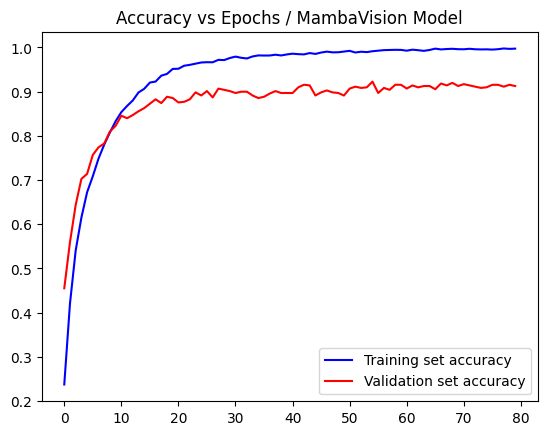

In [24]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / MambaVision Model')
plt.legend()
plt.show()

## Test Model

In [25]:
MambaVisionAug.cuda().load_state_dict(torch.load('modelsMambaVisionAugModel.pt'))
validate_test(model=MambaVisionAug, epoch=0, use_loader=test_loader)

End of validation epoch   0 | time:  0.93s | BCE: 0.1001 | Accuracy: 88.70% |
---------------------------------------------------------------------------------------------------


(0.10005320675284435, 0.8869924812030073)

In [26]:
MambaVisionAug.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'modelsMambaVisionAugModel.pt'))
record_matrix(model=MambaVisionAug, use_loader=test_loader, log_name='MambaVisionAugMatrix.json')

End of Matrix Record, Save file in ./logsMambaVisionAugMatrix.json
---------------------------------------------------------------------------------------------------


# CNN model
## Define Paras

In [8]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 50

train_loader = torch_dataset_loader(Para.TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

In [9]:
CNN = CnnModel()

## Train Model

In [10]:
res = main_train(model=CNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CnnModel.json',
                 save_name='CnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  70/280 batches |  9.81ms/ batch | BCE: 0.3125 | Accuracy: 19.00% |
Epoch  1 | 140/280 batches |  9.50ms/ batch | BCE: 0.3067 | Accuracy: 21.68% |
Epoch  1 | 210/280 batches |  9.32ms/ batch | BCE: 0.3016 | Accuracy: 24.19% |
Epoch  1 | 280/280 batches |  9.30ms/ batch | BCE: 0.2969 | Accuracy: 25.85% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time:  2.64s | BCE: 0.2969 | Accuracy: 25.85% |
End of validation epoch   1 | time:  0.18s | BCE: 0.2756 | Accuracy: 34.76% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  70/280 batches |  9.51ms/ batch | BCE: 0.2828 | Accuracy: 32.71% |
Epoch  2 | 140/280 batches |  9.24ms/ batch | BCE: 0.2781 | Accuracy: 33.93

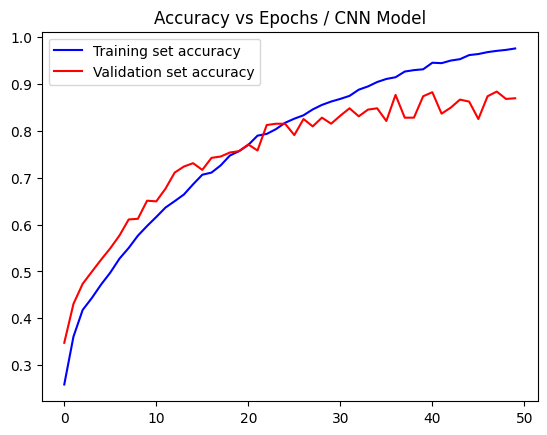

In [11]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CNN Model')
plt.legend()
plt.show()

## Test Model

In [12]:
CNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModel.pt'))
validate_test(model=CNN, epoch=0, use_loader=test_loader)

FileNotFoundError: [Errno 2] No such file or directory: './CnnModel.pt'

In [ ]:
CNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModel.pt'))
record_matrix(model=CNN, use_loader=test_loader, log_name='CnnMatrix.json')

# CRNN Model
## Paras

In [ ]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 60

In [ ]:
CRNN = CrnnModel()

## Train

In [ ]:
res = main_train(model=CRNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CrnnModel.json',
                 save_name='CrnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

## Test Model

In [ ]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CRNN Model')
plt.legend()
plt.show()

In [ ]:
CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnModel.pt'))
validate_test(model=CRNN, epoch=0, use_loader=test_loader)

In [ ]:
CRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnModel.pt'))
record_matrix(model=CRNN, use_loader=test_loader, log_name='CrnnMatrix.json')

# LCRNN Model
## Paras

In [ ]:
Para.learning_rate = 1e-5
Para.batch_size = 20
Para.epoch_num = 60

train_loader = torch_dataset_loader(Para.LA_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.LA_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.LA_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

LCRNN = CrnnLongModel()

## Train

In [ ]:
res = main_train(model=LCRNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='CrnnLongModel.json',
                 save_name='CrnnLongModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

## Test Model

In [ ]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / CRNN Model')
plt.legend()
plt.show()

In [ ]:
LCRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnLongModel.pt'))
validate_test(model=LCRNN, epoch=0, use_loader=test_loader)

In [ ]:
LCRNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CrnnLongModel.pt'))
record_matrix(model=LCRNN, use_loader=test_loader, log_name='CrnnLongMatrix.json')

# RNN Model

In [ ]:
Para.learning_rate = 1e-5
Para.batch_size = 32
Para.epoch_num = 40

train_loader = torch_dataset_loader(Para.LA_TRAIN_DATA_PATH, Para.batch_size, True, Para.kwargs)
validation_loader = torch_dataset_loader(Para.LA_VAL_DATA_PATH, Para.batch_size, False, Para.kwargs)
test_loader = torch_dataset_loader(Para.LA_TEST_DATA_PATH, Para.batch_size, False, Para.kwargs)

RNN = RnnModel()

In [ ]:
res = main_train(model=RNN, 
                 train_loader=train_loader,
                 valid_loader=validation_loader,
                 log_name='RnnModel.json',
                 save_name='RnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

In [ ]:
plt.figure()
plt.plot(res['train_accu'], c='b', label='Training set accuracy')
plt.plot(res['valid_accu'], c='r', label='Validation set accuracy')
plt.title('Accuracy vs Epochs / RCNN Model')
plt.legend()
plt.show()

In [ ]:
RNN.cuda().load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'RnnModel.pt'))
validate_test(model=RNN, epoch=0, use_loader=test_loader)